Read data for LSLR

In [2]:
using DataFrames
using CSV
COL85 = CSV.File("./projections_Col_LSLR_RCP85.csv") |> DataFrame;
COL60 = CSV.File("./projections_Col_LSLR_RCP60.csv") |> DataFrame;
COL45 = CSV.File("./projections_Col_LSLR_RCP45.csv") |> DataFrame;
COL26 = CSV.File("./projections_Col_LSLR_RCP26.csv") |> DataFrame;

NO85 = CSV.File("./projections_NO_LSLR_RCP85.csv") |> DataFrame;
NO60 = CSV.File("./projections_NO_LSLR_RCP60.csv") |> DataFrame;
NO45 = CSV.File("./projections_NO_LSLR_RCP45.csv") |> DataFrame;
NO26 = CSV.File("./projections_NO_LSLR_RCP26.csv") |> DataFrame

Row,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57,Column58,Column59,Column60,Column61,Column62,Column63,Column64,Column65,Column66,Column67,Column68,Column69,Column70,Column71,Column72,Column73,Column74,Column75,Column76,Column77,Column78,Column79,Column80,Column81,Column82,Column83,Column84,Column85,Column86,Column87,Column88,Column89,Column90,Column91,Column92,Column93,Column94,Column95,Column96,Column97,Column98,Column99,Column100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,2010.0,0.0363561,0.0291478,0.0285889,0.0312197,0.037323,0.0261323,0.0218696,0.031101,0.024616,0.0221669,0.0332858,0.0326997,0.021664,0.0350087,0.0328095,0.0267701,0.0349483,0.0280103,0.02912,0.0304326,0.0299235,0.0326933,0.0319428,0.0350767,0.0285813,0.0248661,0.0312059,0.0273094,0.0271364,0.0281629,0.0262134,0.0315695,0.0349633,0.0307926,0.0280118,0.034446,0.0284484,0.0284625,0.0283619,0.0280286,0.0267076,0.0232142,0.0243294,0.0347999,0.0306738,0.029094,0.0352543,0.0270808,0.0275608,0.0295941,0.027938,0.0263387,0.0297025,0.0303494,0.026454,0.0259657,0.0348527,0.0306813,0.0291509,0.0295353,0.0303815,0.0319493,0.0229301,0.0249321,0.0265374,0.0306706,0.032462,0.0250529,0.0264025,0.0277315,0.0370031,0.0296219,0.0362657,0.0274358,0.0378448,0.0266316,0.0358464,0.0313659,0.0268811,0.0302276,0.0284051,0.0312153,0.0276474,0.0309681,0.0290076,0.0310401,0.034963,0.0344541,0.0327186,0.0318006,0.0328001,0.0259238,0.0283449,0.0253141,0.0349129,0.0226829,0.0321816,0.0279363,0.0280796,⋯
2,2020.0,0.0681371,0.0597125,0.0663955,0.0695427,0.0663824,0.0678079,0.0526859,0.0648444,0.0610397,0.0544481,0.0616133,0.0672634,0.0538504,0.0705395,0.0689162,0.0658272,0.0673321,0.0660616,0.0587236,0.0676439,0.0609043,0.0625098,0.0734032,0.073744,0.0557055,0.0560021,0.0631052,0.066239,0.0518767,0.0704936,0.0639507,0.0664695,0.0685857,0.0617194,0.0626018,0.0672691,0.0639681,0.0638726,0.073562,0.066206,0.0676132,0.0623637,0.0613777,0.0690141,0.054772,0.0595469,0.0752274,0.0616708,0.0598495,0.0677767,0.0642617,0.0594643,0.063429,0.0591201,0.0683525,0.062419,0.0686248,0.0609348,0.0614308,0.0691841,0.0644107,0.0663177,0.0647233,0.0519107,0.0634822,0.0670995,0.0651538,0.0576152,0.0559797,0.0589881,0.0789919,0.0581706,0.0769481,0.0545352,0.0701334,0.063631,0.0720481,0.0690162,0.0578276,0.061182,0.0620079,0.0657558,0.0610415,0.0639247,0.0602694,0.0682167,0.066628,0.0646547,0.0763025,0.0705749,0.06408,0.0625445,0.0607626,0.0581611,0.0677887,0.0611537,0.0740656,0.0713836,0.0604861,⋯
3,2030.0,0.112237,0.094424,0.109299,0.114914,0.105473,0.10689,0.0898062,0.0978569,0.0991127,0.0839617,0.105151,0.114369,0.0936909,0.114491,0.11168,0.106887,0.114585,0.108244,0.0927699,0.109202,0.100421,0.0923847,0.123023,0.125784,0.0892321,0.0964206,0.0978114,0.106872,0.0875327,0.12117,0.105935,0.105476,0.120058,0.10128

In [3]:
import Pkg 
Pkg.add("KernelDensity")

┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36
┌ Error: curl_easy_setopt: 48
└ @ Downloads.Curl /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Downloads/src/Curl/utils.jl:36


In [4]:
using KernelDensity

In [5]:
function kernel_pdf(data)
    y=Vector(data[1,2:10001])
    ker_pdf=[kde(y)]
    for i in 2:20 
        y=Vector(data[i,2:10001])
        x=kde(y)
        push!(ker_pdf,x)
    end
    return ker_pdf
end

kernel_pdf (generic function with 1 method)

In [6]:
#Distributions for LSLR for New Orleans and Colima Considering 10000 data of LSLR for each time step
prior_NO26=kernel_pdf(NO26); 
prior_NO45=kernel_pdf(NO45); 
prior_NO60=kernel_pdf(NO60); 
prior_NO85=kernel_pdf(NO85); 

prior_COL26=kernel_pdf(COL26); 
prior_COL45=kernel_pdf(COL45); 
prior_COL60=kernel_pdf(COL60); 
prior_COL85=kernel_pdf(COL85); 


In [7]:
#Save all the pdf for all cases
using Pkg
Pkg.add("JLD2")

In [8]:
using JLD2
save("Prior_pdf_NO26.jld2","prior_NO26",prior_NO26)

In [9]:
import Pkg 
Pkg.add("StatsPlots")

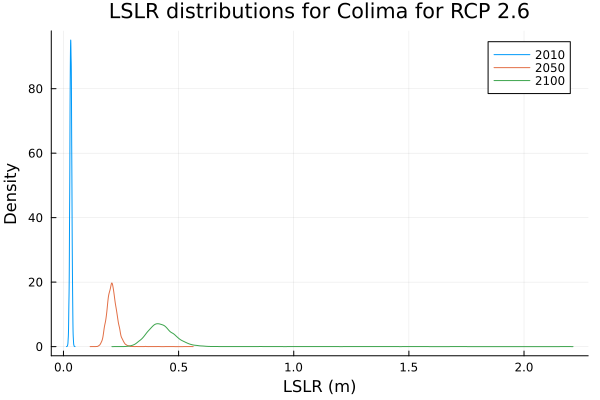

In [10]:
using StatsPlots, Distributions
plot(prior_COL26[1],label = "2010")
plot!(prior_COL26[5],label="2050")
plot!(prior_COL26[10],label="2100")
title!(string("LSLR distributions for Colima for RCP 2.6"))
xlabel!("LSLR (m)")
ylabel!("Density")


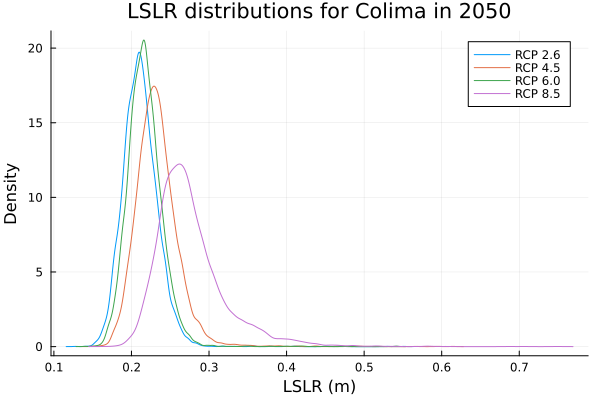

In [13]:
using StatsPlots, Distributions
plot(prior_COL26[5],label = "RCP 2.6 ")
plot!(prior_COL45[5],label="RCP 4.5")
plot!(prior_COL60[5],label="RCP 6.0")
plot!(prior_COL85[5],label="RCP 8.5")
title!(string("LSLR distributions for Colima in 2050"))
xlabel!("LSLR (m)")
ylabel!("Density")